# Absolute price oscillator

The Absolute Price Oscillator (APO) is a class of indicators thet builds on top  
of moving aberages of prices to capture specific short-term deviations in price  

The absolute price ascillator is computed by finding the difference between a fast  
exponential moving average and a slow exponential moving average. Intuitively it is  
trying to measure haw far the more reactive EMA(Fast) is deviation from the more  
stable EMA(Slow). A large difference is usually interpreted as one of two things:  
- instrument prices are starting to trend or break out
- instrument price are far away from their equilibrium price
- overbought or oversold:

Absolute Price Oscillator (APO) values have higher positive and negative values when the  
the price are moving away from long-term EMA very quickly (break out), which can have  
a trend-starting interpretation or an overbought/sold interpretation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
df = pd.read_csv('data/LUNAUSDT.csv')
close = df['Close']

In [17]:
# Time period for the fast EMA
num_period_fast = 10
K_fast = 2 / (num_period_fast + 1)
ema_fast = 0

# Time period for the slow EMA
num_period_slow = 40
K_slow = 2 / (num_period_slow + 1)
ema_slow = 0

# Hold Fast and Slow EMA valuse for visualization
ema_fast_values = []
ema_slow_values = []
apo_values = []

for close_price in close:
    if (ema_fast == 0):
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * K_fast + ema_fast
        ema_slow = (close_price - ema_slow) * K_slow + ema_slow
        
    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    apo_values.append(ema_fast - ema_slow)

In [19]:
# Prepare the data
df_data = df.assign(ClosePrice=pd.Series(close, index=df.index))
df_data = df_data.assign(FastExponential10MovingAverage=pd.Series(ema_fast_values, df.index))
df_data = df_data.assign(SlowExponential40MovingAverage=pd.Series(ema_slow_values, df.index))
df_data = df_data.assign(AbsolutePriceOscillator=pd.Series(apo_values, df.index))

close_price = df_data['ClosePrice']
ema_f = df_data['FastExponential10MovingAverage']
ema_s = df_data['SlowExponential40MovingAverage']
apo = df_data['AbsolutePriceOscillator']

NameError: name 'fig_add_subplot' is not defined

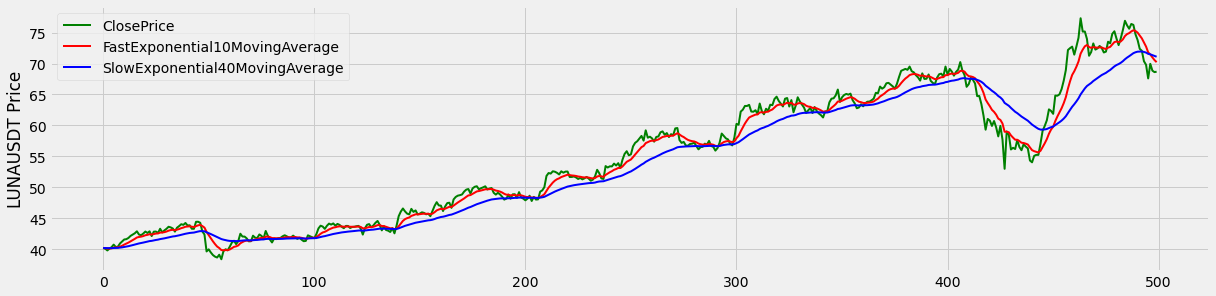

In [20]:
# Visualize the data
fig = plt.figure()
fig.set_size_inches(18.5, 10,5)
ax1 = fig.add_subplot(211, ylabel='LUNAUSDT Price')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='r', lw=2., legend=True)
ema_s.plot(ax=ax1, color='b', lw=2., legend=True)

ax2 = fig_add_subplot(212, ylabel='APO')
apo.plot(ax=ax2, color='black', lw=2., legend=True)

plt.show()